In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

one hot encoding on town column

In [2]:
df = pd.read_csv("homepricesohc.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


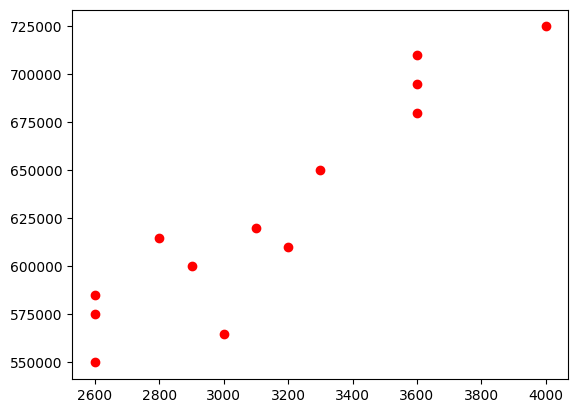

In [3]:

plt.plot(df.area,df.price,'ro')

In [4]:
df.town.value_counts()

town
monroe township    5
west windsor       4
robinsville        4
Name: count, dtype: int64

**dummy variable**
<ul>
<li>
For transforming categorical attributes to numerical attributes, we can use the label encoding procedure (label encoding assigns a unique integer to each category of data). But this procedure is not alone that suitable, hence, One hot encoding is used in regression models following label encoding. This enables us to create new attributes according to the number of classes present in the categorical attribute
</li>

<li>
if there are n number of categories in categorical attribute, n new attributes will be created. These attributes created are called Dummy Variables. Hence, dummy variables are "proxy" variables for categorical data in regression models. 
</li>
</ul>

In [43]:
dummies_town = pd.get_dummies(df.town)
dummies_town

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [6]:
merged = pd.concat([df,dummies_town],axis='columns')
merged.drop(columns=['town'],inplace=True)

In [7]:
merged

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


**dummy variable trap**
<ul>

<li>
The Dummy variable trap is a scenario where there are attributes that are highly correlated (Multicollinear) and one variable predicts the value of others.one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models leads to a dummy variable trap. 
</li>
<li>
Failing to remove one dummy variable prevents the model from estimating a unique, stable, and interpretable set of coefficients due to perfect multicollinearity. The best practice is to always drop one category to serve as a reference group or remove the intercept if you need to keep all the dummy variables. </li>
</ul>

In [8]:
final = merged.drop(columns=['west windsor'] , axis='columns')
final[['monroe township','robinsville']] = final[['monroe township','robinsville']].replace({True:1,False:0})
final

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_6348\2357745469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final[['monroe township','robinsville']] = final[['monroe township','robinsville']].replace({True:1,False:0})


,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
X = final.drop('price',axis='columns')
y = final.price

In [11]:
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
lr.predict([[2800,0,1]])

c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [13]:
lr.predict([[3400,0,0]])

c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [14]:
lr.score(X,y)

0.9573929037221872

In [15]:
y_pred = lr.predict(X)


In [47]:
df = pd.read_csv("homepricesohc.csv")
df.head(2)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000


problem in ohe is you have to do separate encoding and then concatenate with your dataframe you can solve this problem by column transformer that we learn later

In [48]:
from sklearn.preprocessing import OneHotEncoder;

In [53]:
X = df[['town','area']]
y = df.price
X

,town,area
0,monroe township,2600
1,monroe township,3000
2,monroe township,3200
3,monroe township,3600
4,monroe township,4000
5,west windsor,2600
6,west windsor,2800
7,west windsor,3300
8,west windsor,3600
9,robinsville,2600


In [73]:
ohe = OneHotEncoder(drop='first',dtype=np.int32) # to avoid dummy variable trap

In [74]:
X_new = ohe.fit_transform(X[['town']]).toarray()
X_new

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int32)

In [ ]:
X=np.hstack((X_new,X[['area']].values))

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:

lr.predict([[1,0,2800]])

array([590775.63964739])